# Model Evaluation Notebook

## Objectives
- Load the trained model
- Evaluate model performance on test data
- Create visualizations of predictions
- Determine if model meets business requirements

## Inputs
- Trained model from outputs/models/v1/price_prediction_model.pkl
- Test data from prepared dataset

## Outputs
- Performance metrics (R², MAE, RMSE)
- Actual vs Predicted plots
- Business case evaluation

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [26]:
# Load the saved model
print("Loading saved model...")
with open('../outputs/models/v1/price_prediction_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the features list
with open('../outputs/models/v1/features.pkl', 'rb') as file:
    features = pickle.load(file)

print("Model loaded successfully")
print(f"Features used: {features}")

Loading saved model...
Model loaded successfully
Features used: ['Property_Type_Encoded', 'County_Encoded', 'Old_New_Encoded', 'Duration_Encoded', 'Type_Age_Interaction', 'County_Price_Tier', 'Type_Rarity']


In [27]:
# Load the prepared data
df = pd.read_csv('../outputs/datasets/prepared/v1/prepared_data.csv')
print(f"Loaded {len(df)} properties")

# Prepare features and target
X = df[features]
y = df['Price']

# Split data (same split as in training)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Test set size: {len(X_test)} properties")

Loaded 17553 properties
Test set size: 3511 properties


In [28]:
# Make predictions on both sets
print("Making predictions...")

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print(f"Predictions made for {len(test_predictions)} test properties")

Making predictions...
Predictions made for 3511 test properties


In [29]:
# Make predictions on both sets
print("Making predictions...")

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print(f"Predictions made for {len(test_predictions)} test properties")

Making predictions...
Predictions made for 3511 test properties


In [34]:
# Calculate metrics for training set
train_r2 = r2_score(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

print("Training Set Performance:")
print("="*40)
print(f"R² Score: {train_r2:.3f}")
print(f"MAE: £{train_mae:,.0f}")
print(f"RMSE: £{train_rmse:,.0f}")

Training Set Performance:
R² Score: 0.271
MAE: £75,286
RMSE: £112,278


In [35]:
# Calculate metrics for test set
test_r2 = r2_score(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Test Set Performance:")
print("="*40)
print(f"R² Score: {test_r2:.3f}")
print(f"MAE: £{test_mae:,.0f}")
print(f"RMSE: £{test_rmse:,.0f}")

Test Set Performance:
R² Score: 0.223
MAE: £78,521
RMSE: £117,690


In [36]:
# Interpretation of R² score
print("\nR² Score Interpretation:")
print("="*40)
if test_r2 > 0.7:
    print(f"✅ EXCELLENT: Model explains {test_r2*100:.1f}% of price variation")
elif test_r2 > 0.5:
    print(f"✅ GOOD: Model explains {test_r2*100:.1f}% of price variation")
elif test_r2 > 0.3:
    print(f"⚠️ MODERATE: Model explains {test_r2*100:.1f}% of price variation")
elif test_r2 > 0:
    print(f"⚠️ WEAK: Model explains only {test_r2*100:.1f}% of price variation")
else:
    print(f"❌ POOR: Model performs worse than using average price")


R² Score Interpretation:
⚠️ WEAK: Model explains only 22.3% of price variation


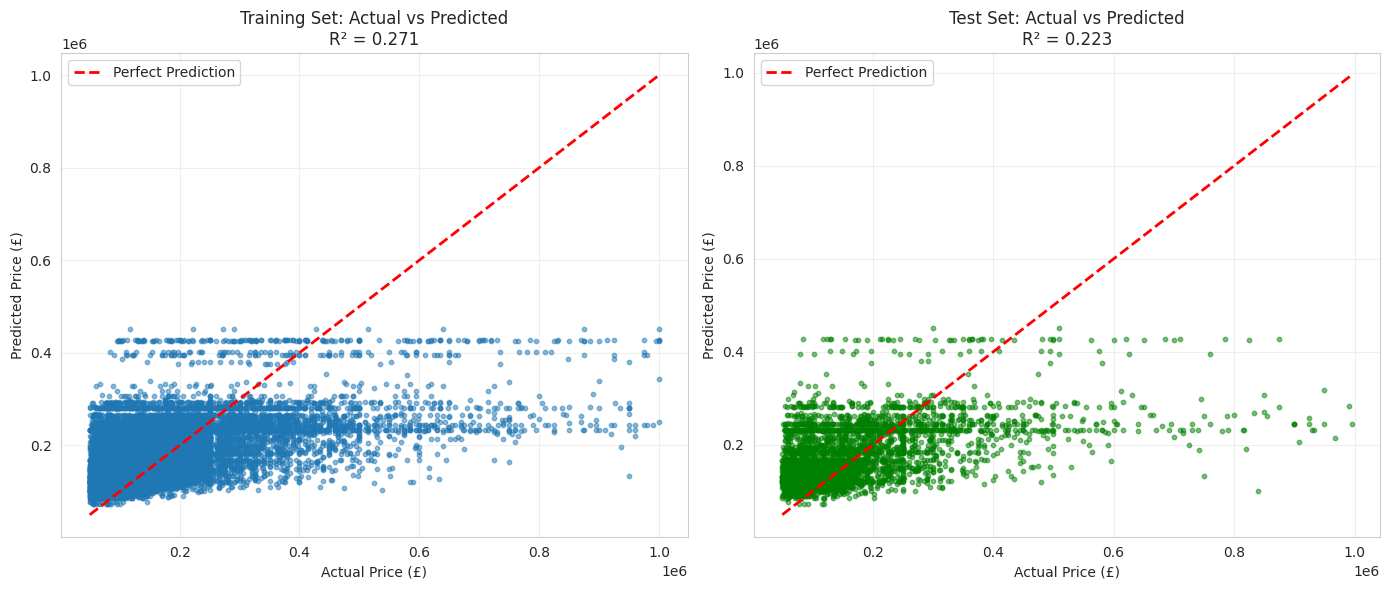

In [37]:
# Actual vs Predicted for Training Set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, alpha=0.5, s=10)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price (£)')
plt.ylabel('Predicted Price (£)')
plt.title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Actual vs Predicted for Test Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, alpha=0.5, s=10, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price (£)')
plt.ylabel('Predicted Price (£)')
plt.title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()